In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [2]:
df_train = pd.read_csv('train.csv')
df_train

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911
...,...,...,...,...,...,...
26293,26293,2018-12-31,Sweden,KaggleMart,Kaggle Hat,823
26294,26294,2018-12-31,Sweden,KaggleMart,Kaggle Sticker,250
26295,26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004
26296,26296,2018-12-31,Sweden,KaggleRama,Kaggle Hat,1441


In [3]:
df_test = pd.read_csv('test.csv')
df_test

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat
...,...,...,...,...,...
6565,32863,2019-12-31,Sweden,KaggleMart,Kaggle Hat
6566,32864,2019-12-31,Sweden,KaggleMart,Kaggle Sticker
6567,32865,2019-12-31,Sweden,KaggleRama,Kaggle Mug
6568,32866,2019-12-31,Sweden,KaggleRama,Kaggle Hat


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26298 non-null  int64 
 1   date      26298 non-null  object
 2   country   26298 non-null  object
 3   store     26298 non-null  object
 4   product   26298 non-null  object
 5   num_sold  26298 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


In [5]:
df_train.isnull().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [6]:
df_train['country'].value_counts()

Finland    8766
Norway     8766
Sweden     8766
Name: country, dtype: int64

In [7]:
df_train['store'].value_counts()

KaggleMart    13149
KaggleRama    13149
Name: store, dtype: int64

In [8]:
df_train['product'].value_counts()

Kaggle Mug        8766
Kaggle Hat        8766
Kaggle Sticker    8766
Name: product, dtype: int64

In [9]:
df_train['date'].value_counts()

2015-01-01    18
2017-09-09    18
2017-09-07    18
2017-09-06    18
2017-09-05    18
              ..
2016-04-30    18
2016-04-29    18
2016-04-28    18
2016-04-27    18
2018-12-31    18
Name: date, Length: 1461, dtype: int64

In [19]:
df_gdp = pd.read_csv('GDP_data_2015_to_2019_Finland_Norway_Sweden.csv', index_col='year')
df_gdp

,GDP_Finland,GDP_Norway,GDP_Sweden
year,,,
2015,234.440,385.802,505.104
2016,240.608,368.827,515.655
2017,255.017,398.394,541.019
2018,275.580,437.000,555.455
2019,268.782,405.510,533.880


In [100]:
df_train['gdp'] = 0.0
for year in df_train['year'].unique():
    for country in df_train['country'].unique():
        df_train.loc[(df_train['year'] == year) & (df_train['country'] == country), 'gdp'] = \
                     df_gdp.loc[year, f'GDP_{country}']
df_train

,row_id,date,country,store,product,num_sold,year,gdp
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,2015,234.440
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,2015,234.440
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,2015,234.440
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,2015,234.440
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,2015,234.440
...,...,...,...,...,...,...,...,...
26293,26293,2018-12-31,Sweden,KaggleMart,Kaggle Hat,823,2018,555.455
26294,26294,2018-12-31,Sweden,KaggleMart,Kaggle Sticker,250,2018,555.455
26295,26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004,2018,555.455
26296,26296,2018-12-31,Sweden,KaggleRama,Kaggle Hat,1441,2018,555.455


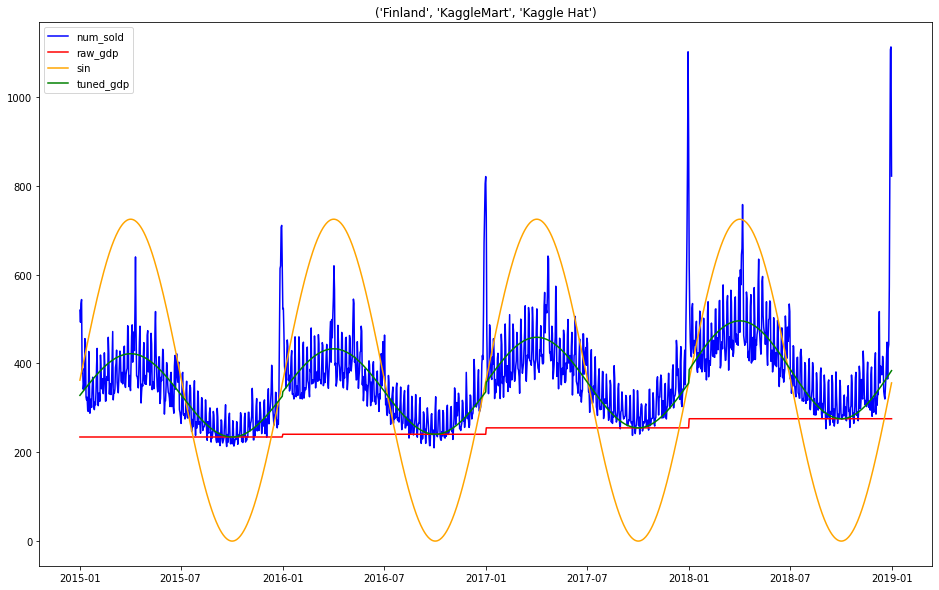

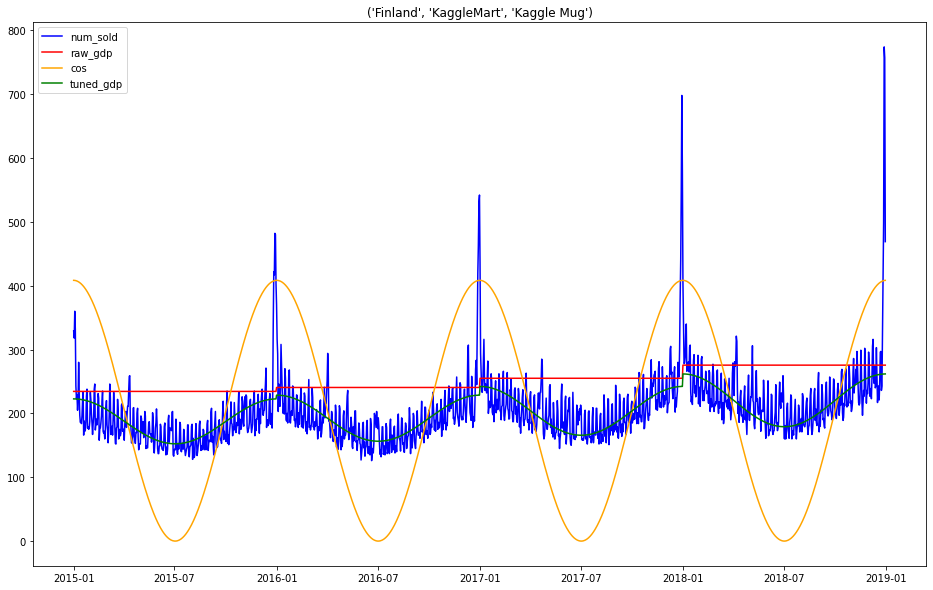

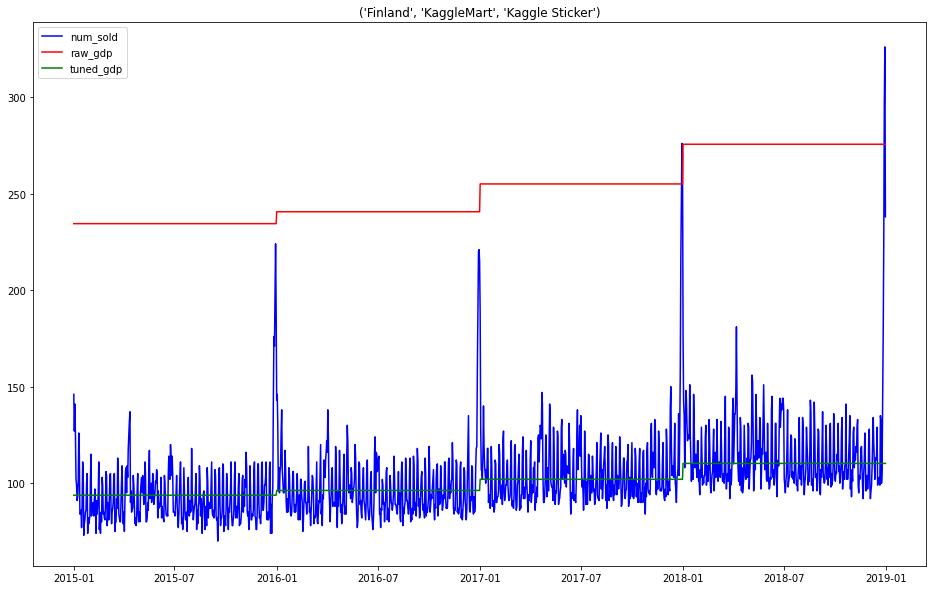

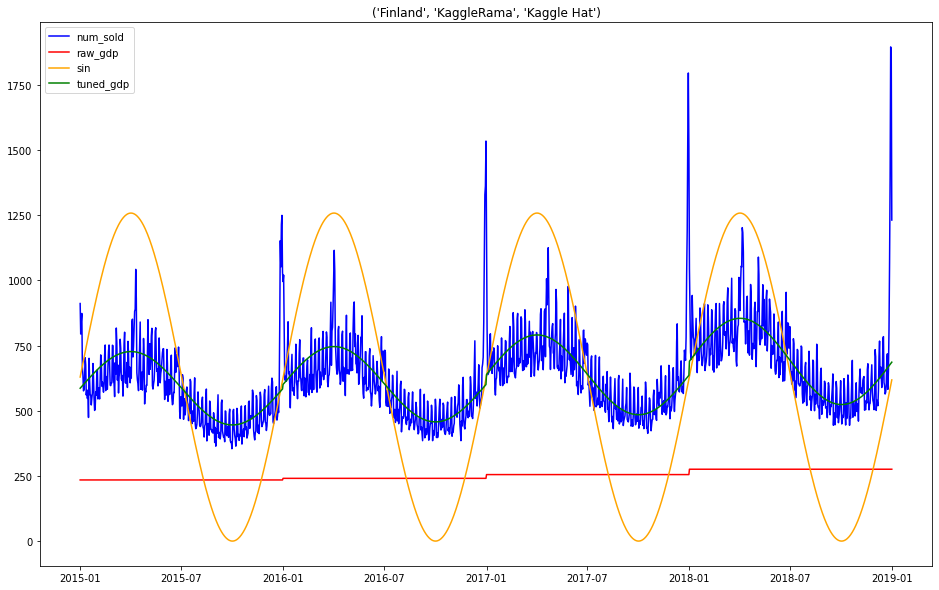

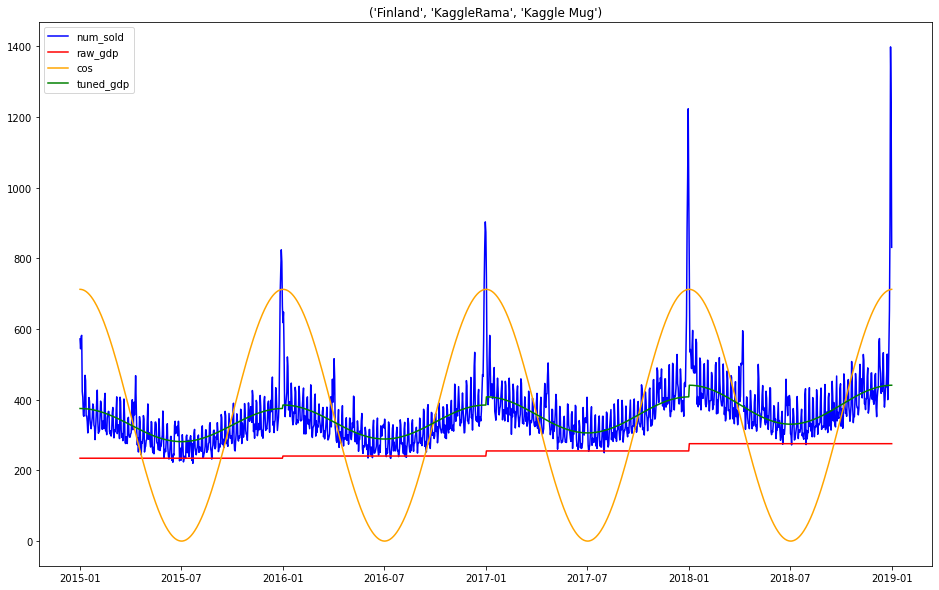

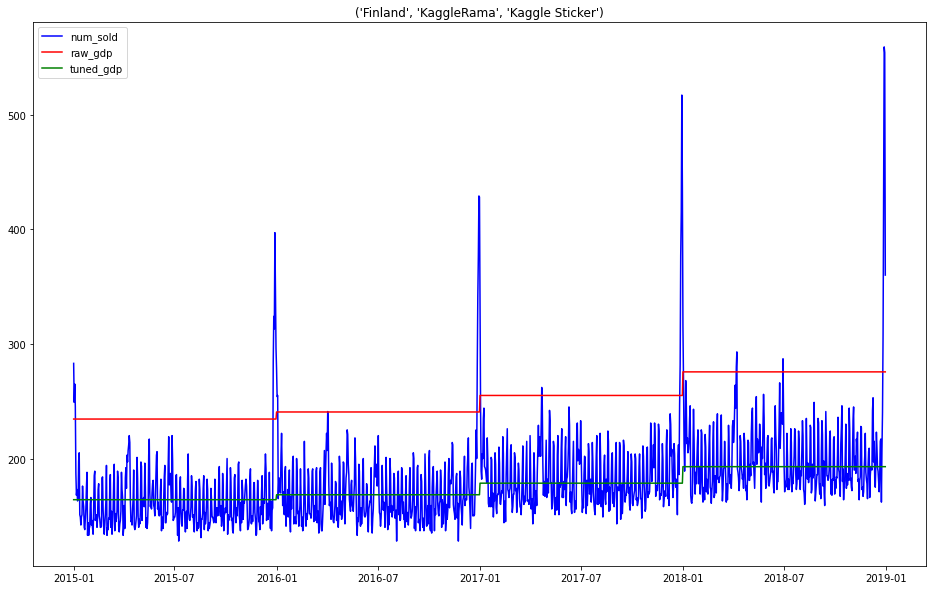

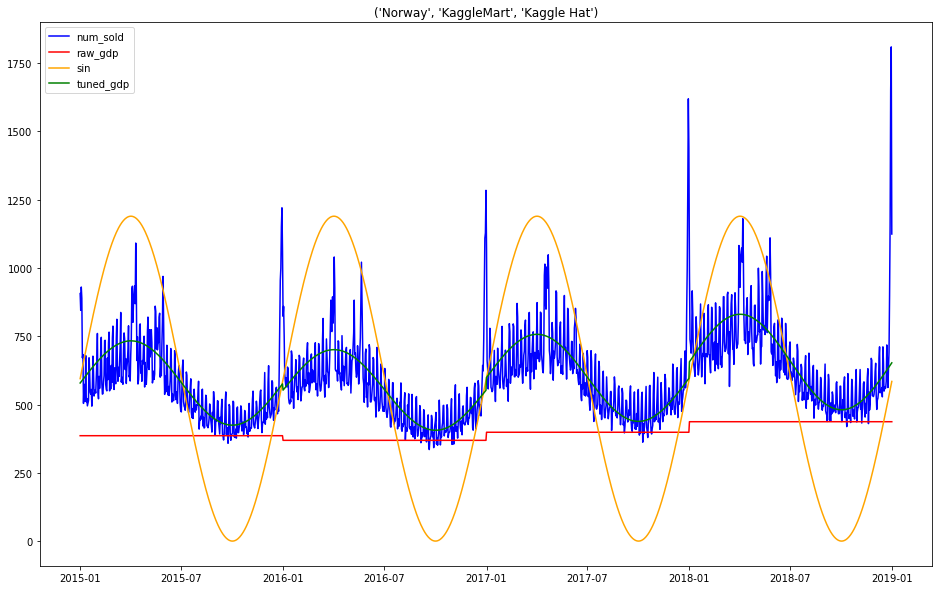

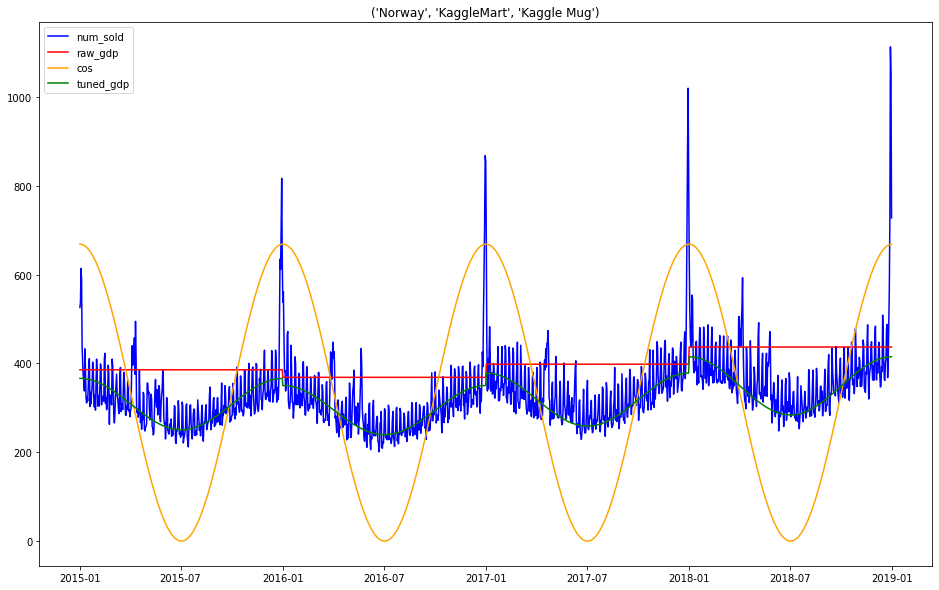

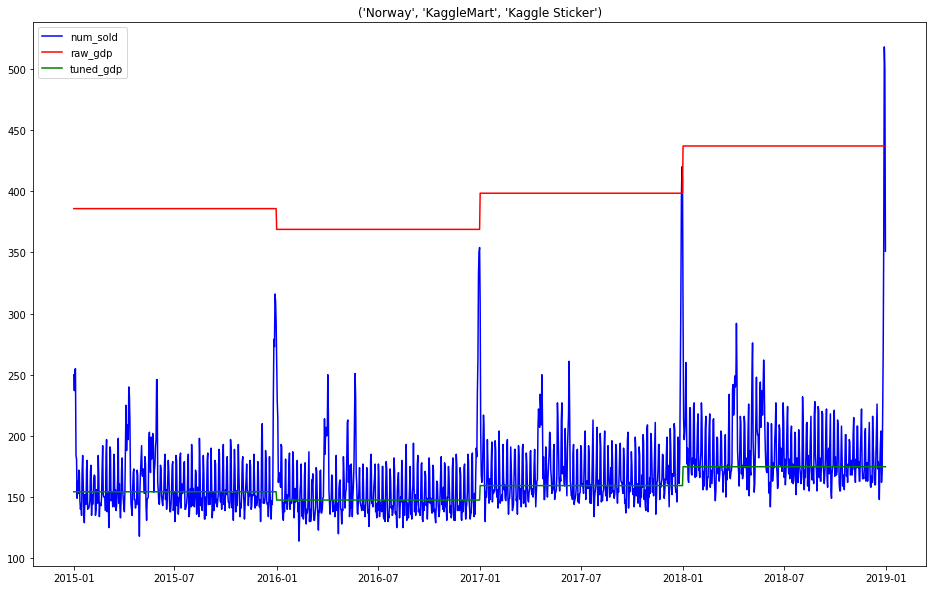

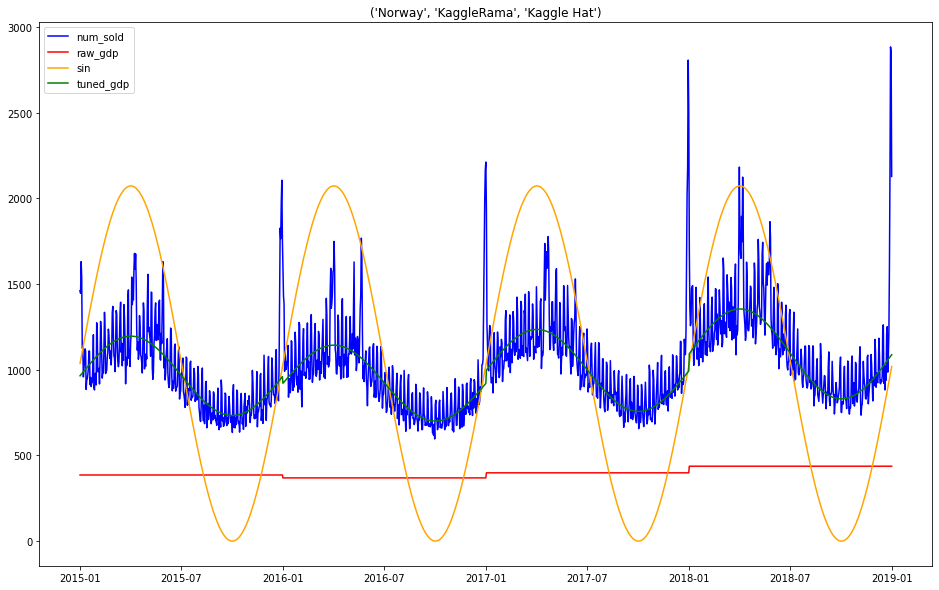

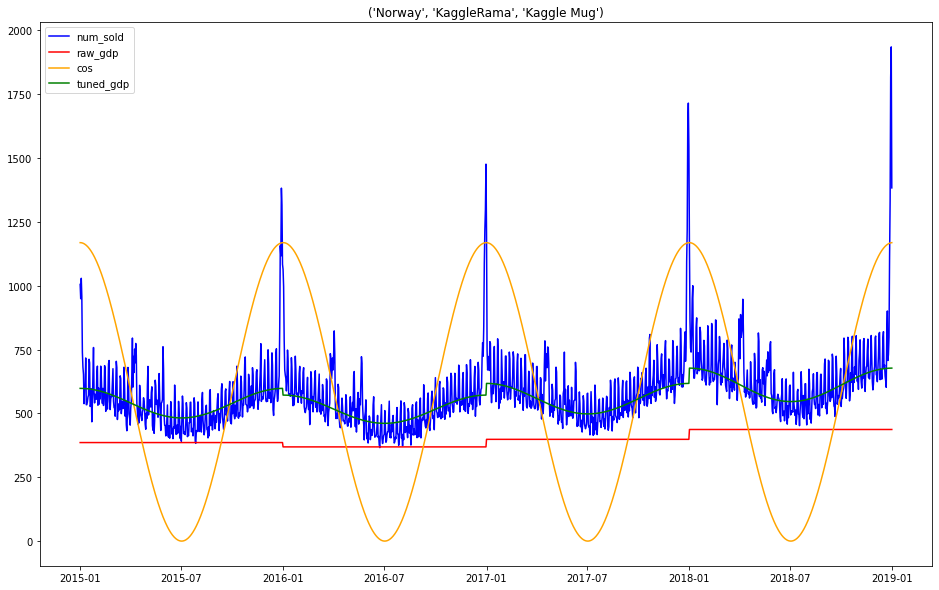

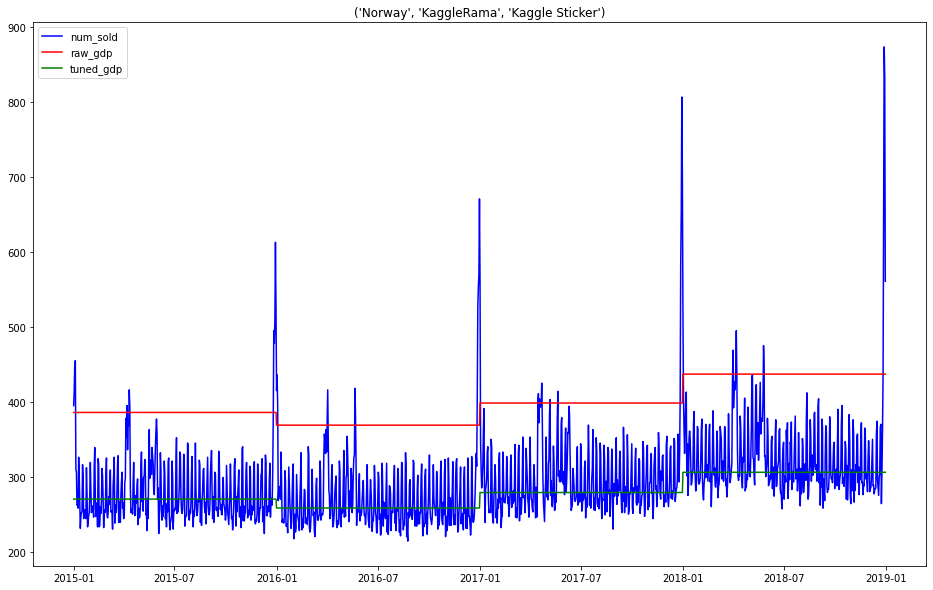

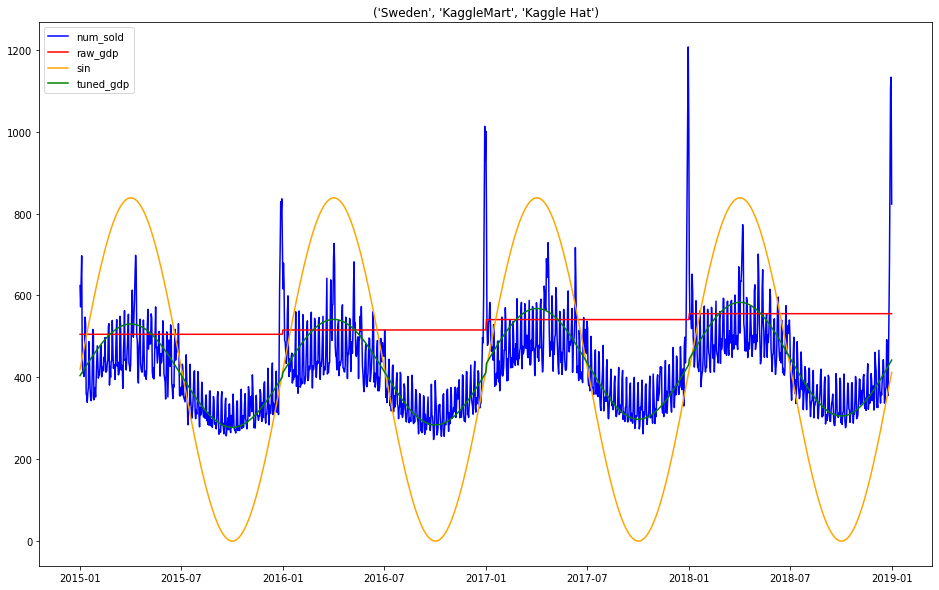

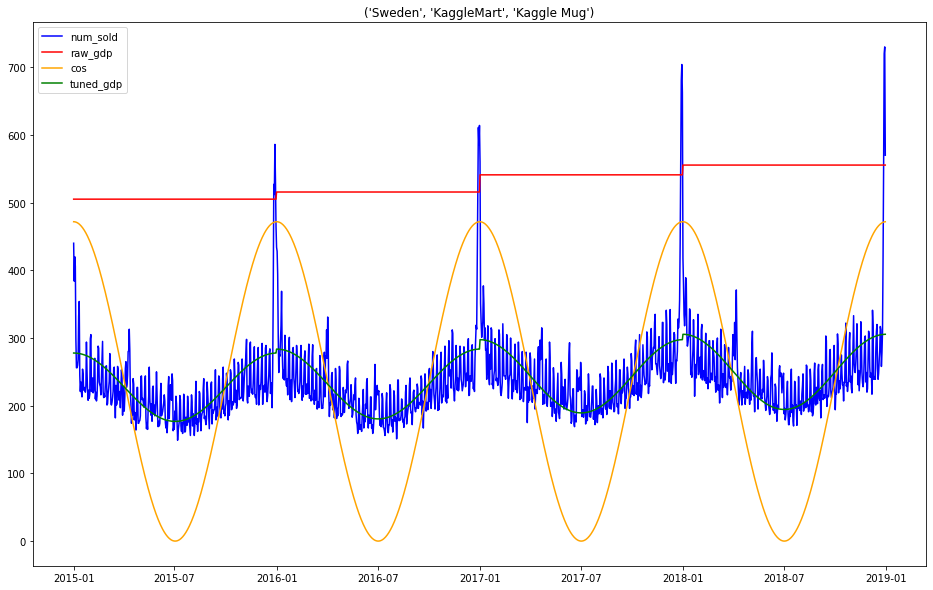

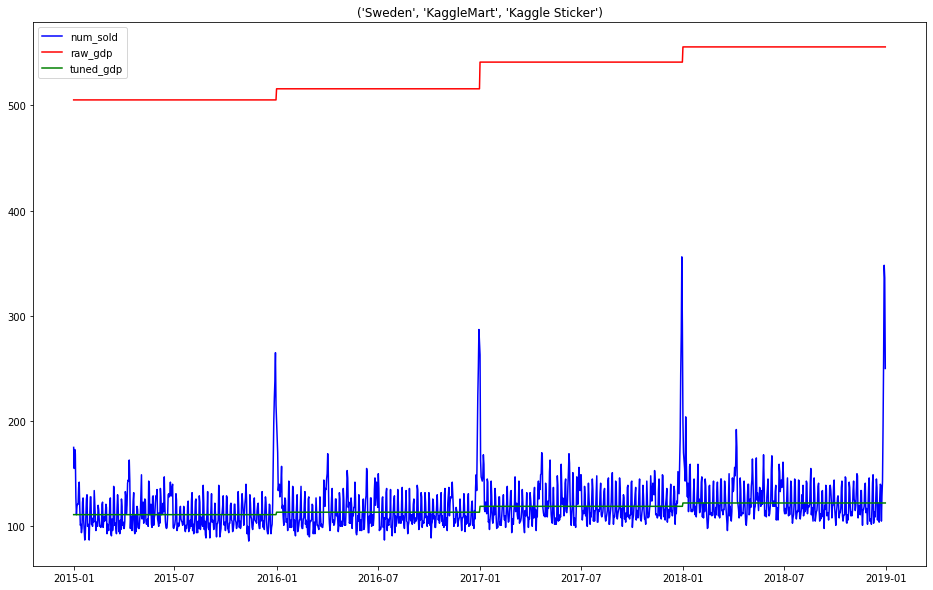

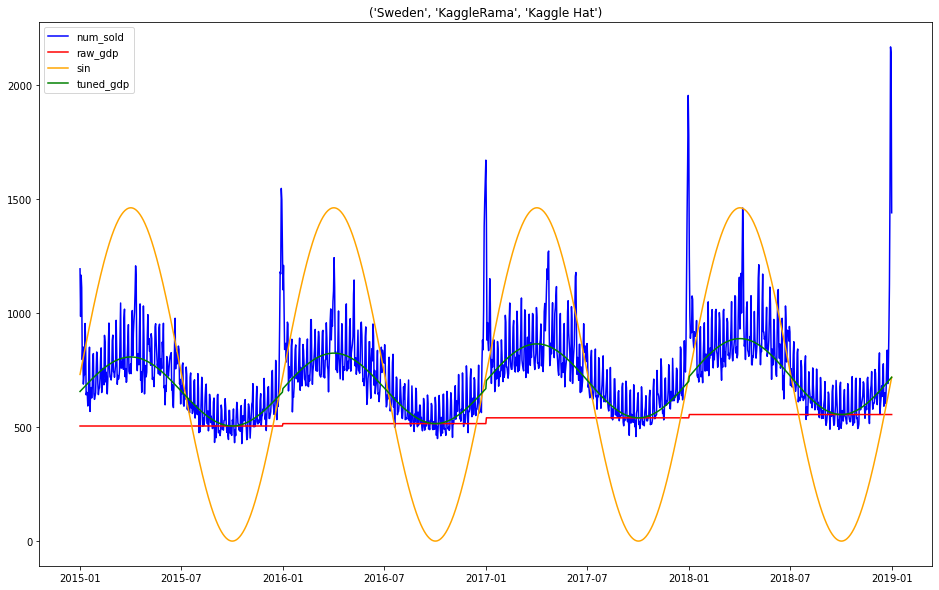

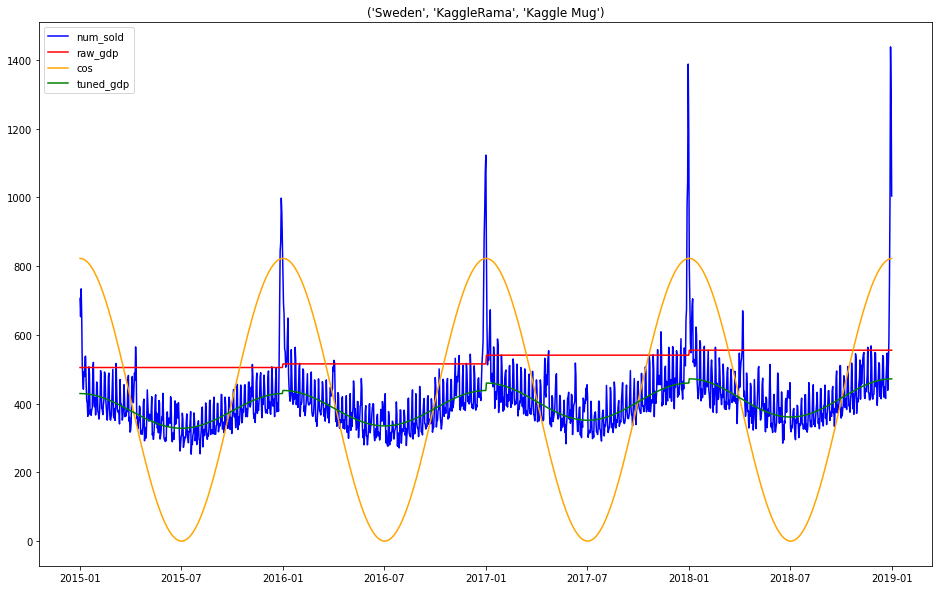

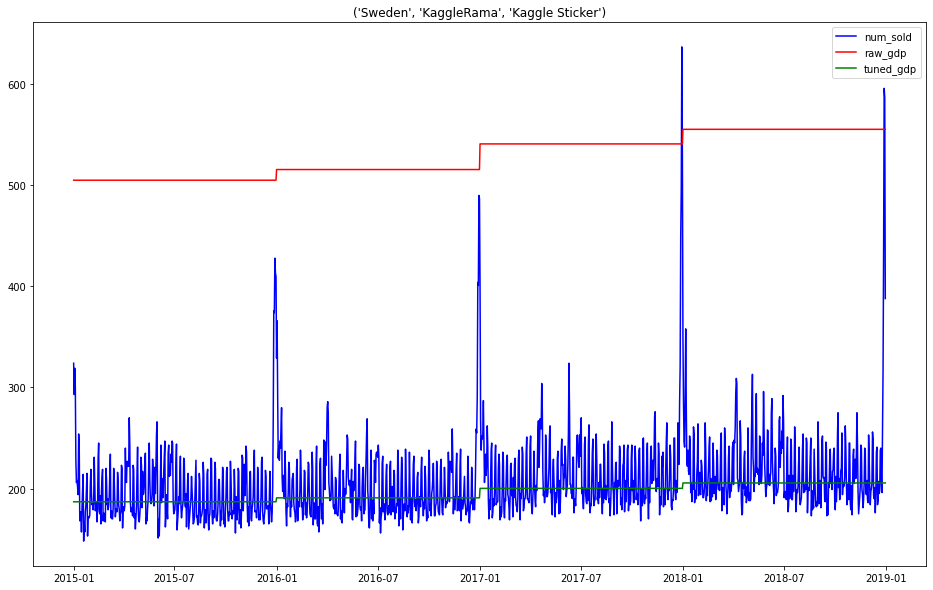

In [184]:
import matplotlib.pyplot as plt

gdp_weight = dict()
gdp_shift = dict()
gdp_weight[('Finland', 'KaggleMart', 'Kaggle Hat')] = 0.4
gdp_shift[('Finland', 'KaggleMart', 'Kaggle Hat')] = 1.4
gdp_weight[('Finland', 'KaggleRama', 'Kaggle Hat')] = 0.6
gdp_shift[('Finland', 'KaggleRama', 'Kaggle Hat')] = 2.5
gdp_weight[('Norway', 'KaggleMart', 'Kaggle Hat')] = 0.4
gdp_shift[('Norway', 'KaggleMart', 'Kaggle Hat')] = 1.5
gdp_weight[('Norway', 'KaggleRama', 'Kaggle Hat')] = 0.6
gdp_shift[('Norway', 'KaggleRama', 'Kaggle Hat')] = 2.5
gdp_weight[('Sweden', 'KaggleMart', 'Kaggle Hat')] = 0.25
gdp_shift[('Sweden', 'KaggleMart', 'Kaggle Hat')] = 0.8
gdp_weight[('Sweden', 'KaggleRama', 'Kaggle Hat')] = 0.3
gdp_shift[('Sweden', 'KaggleRama', 'Kaggle Hat')] = 1.3
gdp_weight[('Finland', 'KaggleMart', 'Kaggle Mug')] = 0.15
gdp_shift[('Finland', 'KaggleMart', 'Kaggle Mug')] = 0.8
gdp_weight[('Finland', 'KaggleRama', 'Kaggle Mug')] = 0.2
gdp_shift[('Finland', 'KaggleRama', 'Kaggle Mug')] = 1.4
gdp_weight[('Norway', 'KaggleMart', 'Kaggle Mug')] = 0.15
gdp_shift[('Norway', 'KaggleMart', 'Kaggle Mug')] = 0.8
gdp_weight[('Norway', 'KaggleRama', 'Kaggle Mug')] = 0.15
gdp_shift[('Norway', 'KaggleRama', 'Kaggle Mug')] = 1.4
gdp_weight[('Sweden', 'KaggleMart', 'Kaggle Mug')] = 0.1
gdp_shift[('Sweden', 'KaggleMart', 'Kaggle Mug')] = 0.45
gdp_weight[('Sweden', 'KaggleRama', 'Kaggle Mug')] = 0.1
gdp_shift[('Sweden', 'KaggleRama', 'Kaggle Mug')] = 0.75

gdp_weight[('Finland', 'KaggleMart', 'Kaggle Sticker')] = 0.4
gdp_weight[('Finland', 'KaggleRama', 'Kaggle Sticker')] = 0.7
gdp_weight[('Norway', 'KaggleMart', 'Kaggle Sticker')] = 0.4
gdp_weight[('Norway', 'KaggleRama', 'Kaggle Sticker')] = 0.7
gdp_weight[('Sweden', 'KaggleMart', 'Kaggle Sticker')] = 0.22
gdp_weight[('Sweden', 'KaggleRama', 'Kaggle Sticker')] = 0.37

for i, (comb, data) in enumerate(df_train.set_index('date').groupby(['country', 'store', 'product'])):
    fig = plt.subplots(figsize=(16, 10))
    plt.plot(data['num_sold'], color='blue', label='num_sold')
    
    plt.plot(data.index, data['gdp'], color='red', label='raw_gdp')
    
    country, store, product = comb
    
    if 'Kaggle Hat' in comb:
        time = np.arange(0, np.pi*8, np.pi*8 / len(data));
        amplitude = np.sin(time)
        plt.plot(data.index, (amplitude*data['num_sold'].mean()) + data['num_sold'].mean(), color='orange', label='sin')
        
        data.loc[(data['country'] == country) & (data['store'] == store) & \
                (data['product'] == product), 'gdp'] = \
                ((amplitude*data['gdp'])*gdp_weight[comb]) + data['gdp']*gdp_shift[comb]
        
    elif 'Kaggle Mug' in comb:
        time = np.arange(0, np.pi*8, np.pi*8 / len(data));
        amplitude = np.cos(time)
        plt.plot(data.index, (amplitude*data['num_sold'].mean()) + data['num_sold'].mean(), color='orange', label='cos')
        
        data.loc[(data['country'] == country) & (data['store'] == store) & \
                (data['product'] == product), 'gdp'] = \
                ((amplitude*data['gdp'])*gdp_weight[comb]) + data['gdp']*gdp_shift[comb]
    
    elif 'Kaggle Sticker' in comb:
        data.loc[(data['country'] == country) & (data['store'] == store) & \
                (data['product'] == product), 'gdp'] = data['gdp']*gdp_weight[comb]
    
    plt.plot(data.index, data['gdp'], color='green', label='tuned_gdp')
    plt.title(comb)
    plt.legend(loc='best')
    plt.show()

In [12]:
def prepare_data(data):
    data['date'] = pd.to_datetime(data['date'])
    data['day'] = data['date'].dt.day
    data['day_of_week'] = data['date'].dt.day_of_week
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data['dayofyear'] = data['date'].dt.dayofyear

    cal = calendar()
    holidays = cal.holidays(start=data['date'].min(), end=data['date'].max())
    data['holiday'] = data['date'].isin(holidays)
    
    data = pd.concat([data, pd.get_dummies(data['country'], dtype=float, prefix='country')], axis=1)
    data = pd.concat([data, pd.get_dummies(data['store'], dtype=float, prefix='store')], axis=1)
    data = pd.concat([data, pd.get_dummies(data['product'], dtype=float, prefix='product')], axis=1)
    data = data.drop(['country', 'store', 'product'], axis=1)

    #data['country'] = data['country'].factorize()[0]
    #data['store'] = data['store'].factorize()[0]
    #data['product'] = data['product'].factorize()[0]

    data = data.drop(['row_id', 'date'], axis=1)

    return data

In [13]:
submission = df_test[['row_id']]
df_train = prepare_data(df_train)
df_test = prepare_data(df_test)

In [14]:
df_train

,num_sold,day,day_of_week,month,year,dayofyear,holiday,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker
0,329,1,3,1,2015,1,True,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,520,1,3,1,2015,1,True,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,146,1,3,1,2015,1,True,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,572,1,3,1,2015,1,True,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,911,1,3,1,2015,1,True,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26293,823,31,0,12,2018,365,False,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
26294,250,31,0,12,2018,365,False,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
26295,1004,31,0,12,2018,365,False,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
26296,1441,31,0,12,2018,365,False,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [15]:
df_test

,day,day_of_week,month,year,dayofyear,holiday,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker
0,1,1,1,2019,1,True,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1,1,2019,1,True,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,1,1,2019,1,True,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,1,1,2019,1,True,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1,1,1,2019,1,True,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565,31,1,12,2019,365,False,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
6566,31,1,12,2019,365,False,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
6567,31,1,12,2019,365,False,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6568,31,1,12,2019,365,False,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [22]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

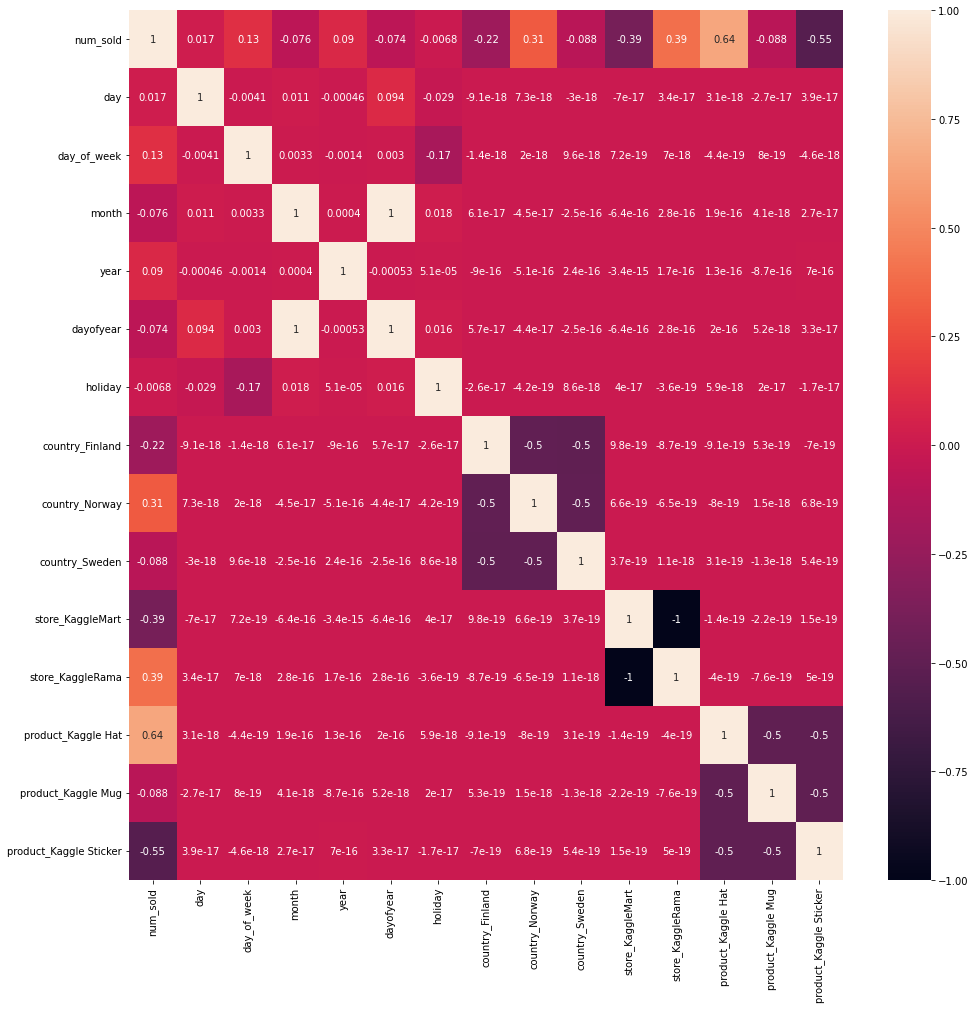

In [18]:
ax, fig = plt.subplots(figsize=(16, 16))
sns.heatmap(df_train.corr(), annot=True)

In [19]:
def smape(target, predicted):
    return 100/len(target) * np.sum(2 * np.abs(predicted - target) / (np.abs(target) + np.abs(predicted)))

In [28]:
def lgb_run(data):
    models = []
    full_preds = np.zeros(len(data))
    kfold = KFold(n_splits=5, random_state=0, shuffle=True)
    for fold, (trn_ind, val_ind) in enumerate(kfold.split(data.drop('num_sold', axis=1), data['num_sold'])):
        x_train, y_train = data.loc[trn_ind].drop('num_sold', axis=1), data.loc[trn_ind, 'num_sold']
        x_val, y_val = data.loc[val_ind].drop('num_sold', axis=1), data.loc[val_ind, 'num_sold']

        model = LGBMRegressor()
        model.fit(x_train, y_train)
        predictions = model.predict(x_val)
        full_preds[y_val.index] = predictions
        models.append(model)
    print(f'MAPE: {mean_absolute_percentage_error(data["num_sold"], full_preds)}')
    print(f'SMAPE: {smape(data["num_sold"], full_preds)}')
    ax = lgb.plot_importance(models[-1], max_num_features=40, figsize=(15,15))
    plt.show()
    return models

MAPE: 0.05084040898729505
SMAPE: 5.059963981386453


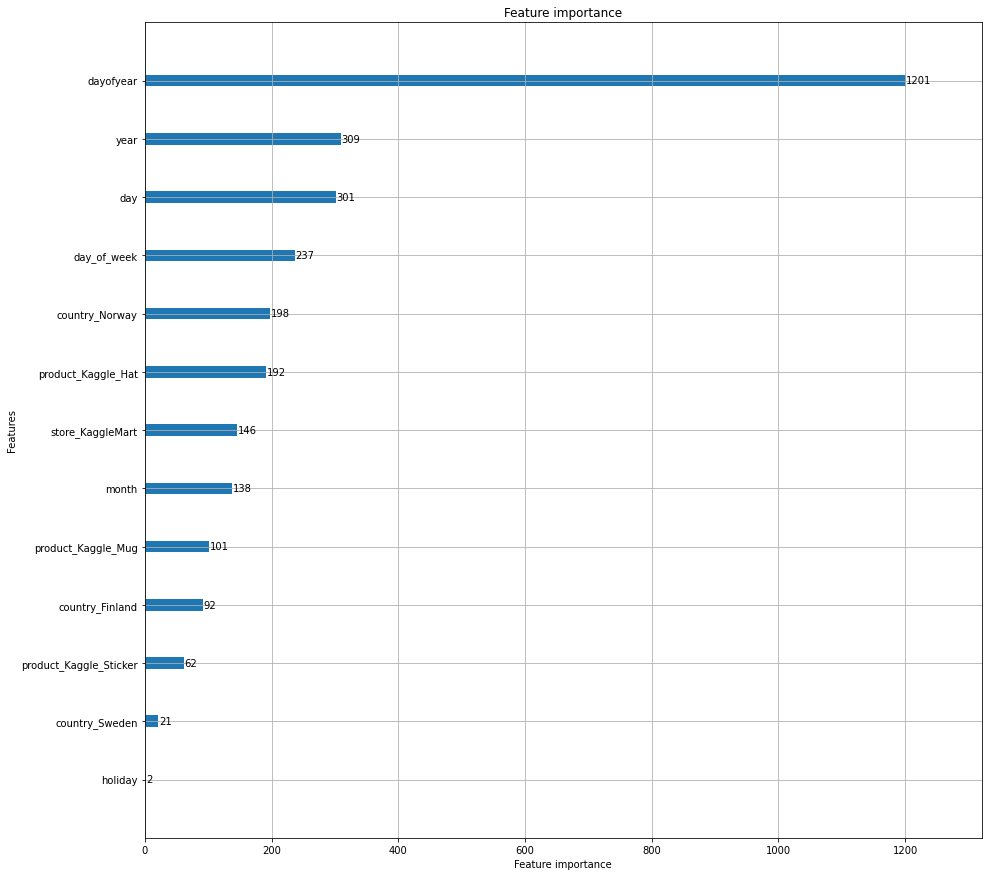

In [29]:
models = lgb_run(df_train.drop('num_sold_bins', axis=1))

In [ ]:
test_preds = np.zeros(len(df_test))
for model in models:
    test_preds = test_preds + model.predict(df_test)
test_preds /= len(models)
test_preds

In [ ]:
# This gave me 7.16823 score
submission['num_sold'] = test_preds
submission.to_csv('submission.csv', index=False)

In [ ]:
preds = np.zeros(len(df_train))
for model in models:
    preds += model.predict(df_train.drop(['num_sold', 'num_sold_bins'], axis=1))
preds /= len(models)
preds

In [ ]:
smape(df_train['num_sold'], preds)